In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


file_path = r"data\sama_2014-10-13\measurements_0347.csv"
df = pd.read_csv(file_path)

df_encoded = pd.get_dummies(df, columns=["Type"], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '').str.replace('"', '')

X = df_encoded[["Size", "Type_Parallel", "Type_Sequential"]]  # features
y = df_encoded["Time"]  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.000509190795268603


In [21]:
coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns
formula = "Time = " + f"{intercept:.4f} "

for feature, coef in zip(feature_names, coefficients):
    formula += f"+ ({coef:.4f} * {feature}) "

print(formula)

Time = 0.0058 + (0.0000 * Size) + (-0.0000 * Type_Parallel) + (-0.0030 * Type_Sequential) 


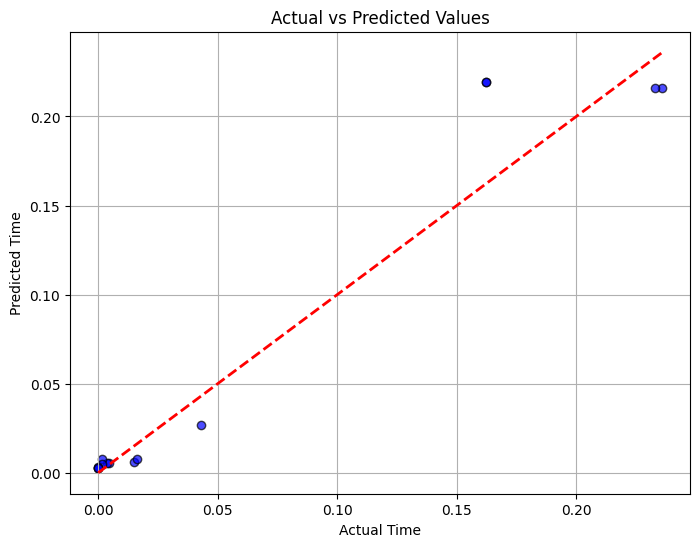

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.grid(True)
plt.show()


### Add polynomial terms to check if non-linearity improves predictions:

In [15]:
from sklearn.preprocessing import PolynomialFeatures  
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)  
X_test_poly = poly.transform(X_test)  
model_poly = LinearRegression()  
model_poly.fit(X_train_poly, y_train)  
y_pred_poly = model_poly.predict(X_test_poly)  
mse_poly = mean_squared_error(y_test, y_pred_poly)  
print(f"Polynomial MSE: {mse_poly}")  


Polynomial MSE: 3.211562394574988e-05


In [16]:
mse_poly < mse

True

In [24]:
improvement = ((mse - mse_poly) / mse) * 100
print(f"Polynomial Regression reduces MSE by {improvement:.2f}% compared to Linear Regression.")


Polynomial Regression reduces MSE by 93.69% compared to Linear Regression.


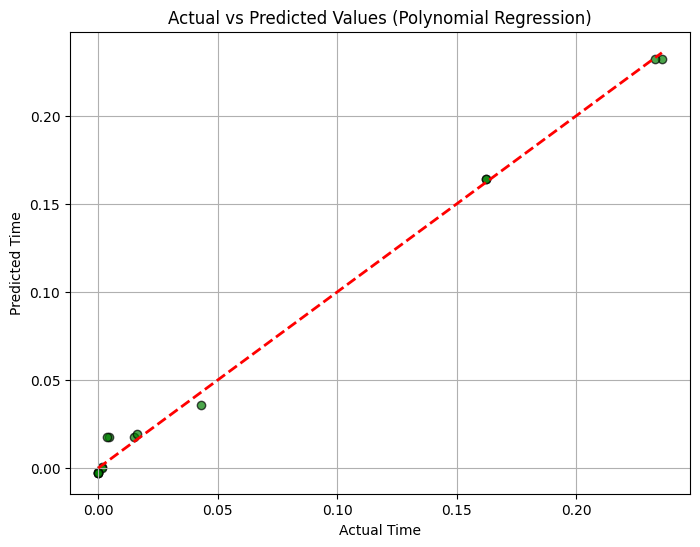

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='green', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.grid(True)
plt.show()


In [19]:
feature_names = poly.get_feature_names_out(X.columns)
coefficients = model_poly.coef_
intercept = model_poly.intercept_
formula = "Time = " + f"{intercept:.4f} "

for feature, coef in zip(feature_names, coefficients):
    formula += f"+ ({coef:.4f} * {feature}) "

print(formula)

Time = -0.0022 + (0.0000 * 1) + (0.0000 * Size) + (0.0099 * Type_Parallel) + (-0.0002 * Type_Sequential) + (-0.0000 * Size^2) + (-0.0000 * Size Type_Parallel) + (-0.0000 * Size Type_Sequential) + (0.0099 * Type_Parallel^2) + (0.0000 * Type_Parallel Type_Sequential) + (-0.0002 * Type_Sequential^2) 


In [30]:
from sklearn.linear_model import BayesianRidge, Lasso, Ridge

# Bayesian Linear Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
print(f"Bayesian Linear Regression Mean Squared Error: {mse_bayesian}")


# Ridge Regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

# Lasso Regression model (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso}")

Bayesian Linear Regression Mean Squared Error: 0.0004971208208299663
Ridge Regression Mean Squared Error: 0.0005087108857205518
Lasso Regression Mean Squared Error: 0.000495659374633142


#### Bayesian and Lasso Regression got better results